# Propagation effects

In this notebook we will have a look at the individuel propagation effects that can be included.

## Setup

In [1]:
from auraliser import Auraliser, mono
from auraliser.generator import Sine, NoiseBands
import numpy as np
from geometry import Point
from IPython.display import Audio
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)
%matplotlib inline
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
from acoustics.signal import OctaveBand

In [2]:
fs = 16000.0      # Sample frequency
duration = 15.      # Duration in seconds
df = 50.0           # Frequency resolution (impedances reflections)

dt = 1.0/fs                             # Seconds per sample
t = np.arange(0.0, duration, dt)        # Time vector

model = Auraliser(duration=duration, sample_frequency=fs)

We will need a source

In [3]:
velocity = 0.0
x = np.ones_like(t) * velocity * (t - duration/2.0)    # Source moves along the x-axis.
y = np.ones_like(t) * 0.01
z = np.ones_like(t) * 100.0   # Altitude of source
src = model.add_source(name='source', position=np.vstack((x,y,z)).T)
#src = model.add_source(name='source', position=Point(0.0,0.0,0.0))
subsrc = src.add_subsource(name='subsource')

In [4]:
sine = subsrc.add_virtualsource('sine', signal = Sine(frequency=1000.0))
#noise = subsrc.add_virtualsource('whiteband', signal=NoiseBands(bands=OctaveBand(center=2000.0)))

and a receiver.

In [5]:
rcv = model.add_receiver(name='receiver', position=Point(100.0,0.0,0.0))

Because we would like to consider the propagation effects individually we turn them all of for now.

In [6]:
model.settings['spreading']['include'] = False
model.settings['doppler']['include'] = False
model.settings['atmospheric_absorption']['include'] = False
model.settings['reflections']['include'] = False
model.settings['turbulence']['include'] = False

## Effects

Now that we have a basic model to work with we look at the propagation effects one by one.

In [7]:
signal = mono( rcv.auralise() )

INFO:root:auralise: Auralising at receiver
INFO:root:auralise: Can auralise.
INFO:root:_auralise_source: Auralising source source
INFO:root:_auralise_subsource: Generating subsource emission signals.
INFO:root:_auralise_subsource: Determine mirrors.
INFO:root:_auralise_subsource: Not searching for mirror sources. Either reflections are disabled or there are no walls.
INFO:root:_apply_propagation_effects: Auralising mirror
INFO:root:_auralise_source: Finished auralising source source


In [8]:
Audio(data=signal, rate=fs)

### Distance reduction

In the far field sound spreads out spherically. This results in a decrease in amplitude with increase in distance.

In [9]:
model.settings['spreading']['include'] = True
signal = mono( rcv.auralise() )
model.settings['spreading']['include'] = False

INFO:root:auralise: Auralising at receiver
INFO:root:auralise: Can auralise.
INFO:root:_auralise_source: Auralising source source
INFO:root:_auralise_subsource: Generating subsource emission signals.
INFO:root:_auralise_subsource: Determine mirrors.
INFO:root:_auralise_subsource: Not searching for mirror sources. Either reflections are disabled or there are no walls.
INFO:root:_apply_propagation_effects: Auralising mirror
INFO:root:_apply_propagation_effects: Applying spherical spreading.
INFO:root:_auralise_source: Finished auralising source source


In [10]:
Audio(data=signal, rate=fs)

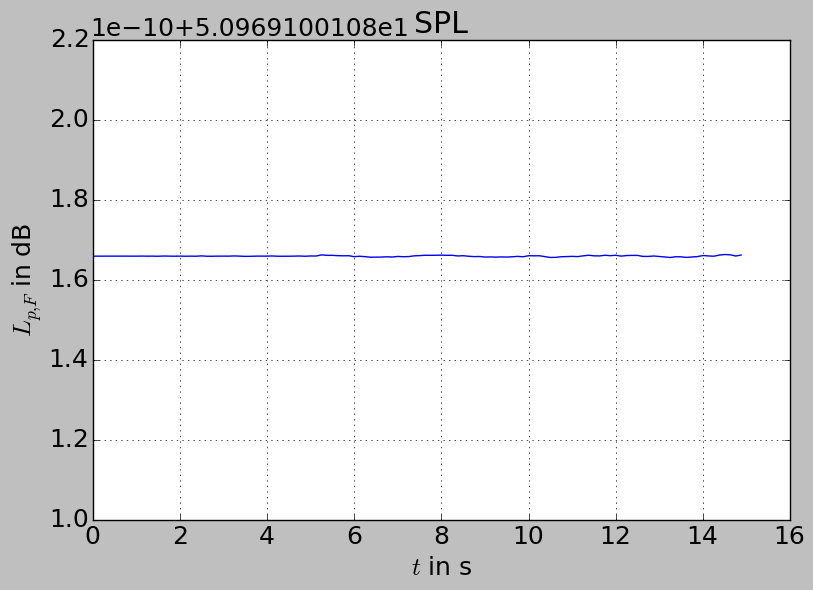

In [11]:
fig = signal.plot_levels()

### Time delay

Sound has a limited velocity resulting in a delay between emission and receivement. Movement of source and/or receiver can result in a variable time delay.

Besides the obvious time delay this also results in a Doppler shift in frequency.

In [12]:
model.settings['doppler']['include'] = True
signal = mono( rcv.auralise() )
model.settings['doppler']['include'] = False

INFO:root:auralise: Auralising at receiver
INFO:root:auralise: Can auralise.
INFO:root:_auralise_source: Auralising source source
INFO:root:_auralise_subsource: Generating subsource emission signals.
INFO:root:_auralise_subsource: Determine mirrors.
INFO:root:_auralise_subsource: Not searching for mirror sources. Either reflections are disabled or there are no walls.
INFO:root:_apply_propagation_effects: Auralising mirror
INFO:root:_apply_propagation_effects: Applying Doppler frequency shift.
INFO:root:_auralise_source: Finished auralising source source


In [13]:
Audio(data=signal, rate=fs)

/home/freddy/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


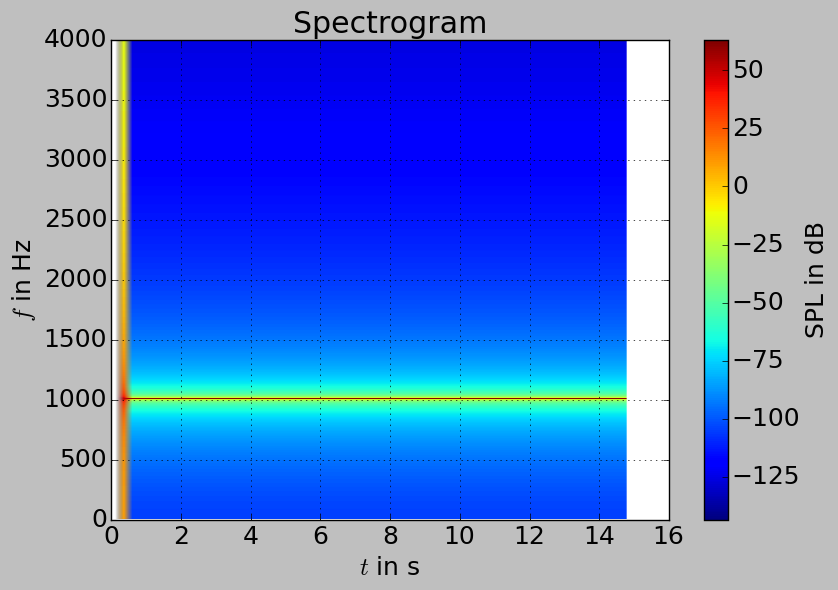

In [14]:
fig = signal.spectrogram(ylim=(0.0, 4000.0))

### Atmospheric absorption

Relaxation effects in the atmosphere result in additional attenuatation. 

In [15]:
model.settings['atmospheric_absorption']['include'] = True
signal = mono( rcv.auralise() )
model.settings['atmospheric_absorption']['include'] = False

INFO:root:auralise: Auralising at receiver
INFO:root:auralise: Can auralise.
INFO:root:_auralise_source: Auralising source source
INFO:root:_auralise_subsource: Generating subsource emission signals.
INFO:root:_auralise_subsource: Determine mirrors.
INFO:root:_auralise_subsource: Not searching for mirror sources. Either reflections are disabled or there are no walls.
INFO:root:_apply_propagation_effects: Auralising mirror
INFO:root:_apply_propagation_effects: Applying atmospheric absorption.
INFO:root:_auralise_source: Finished auralising source source


In [16]:
Audio(data=signal, rate=fs)

/home/freddy/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


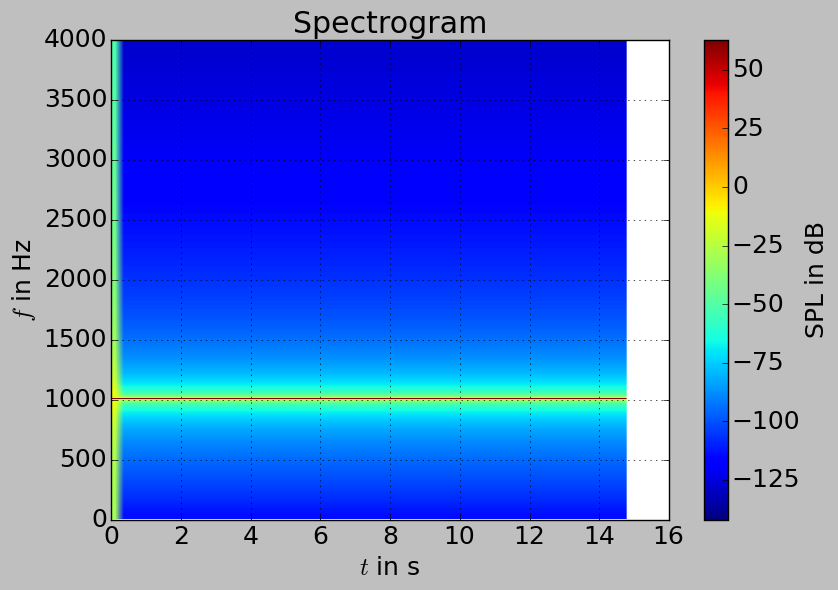

In [17]:
fig = signal.spectrogram(ylim=(0.0, 4000.0))

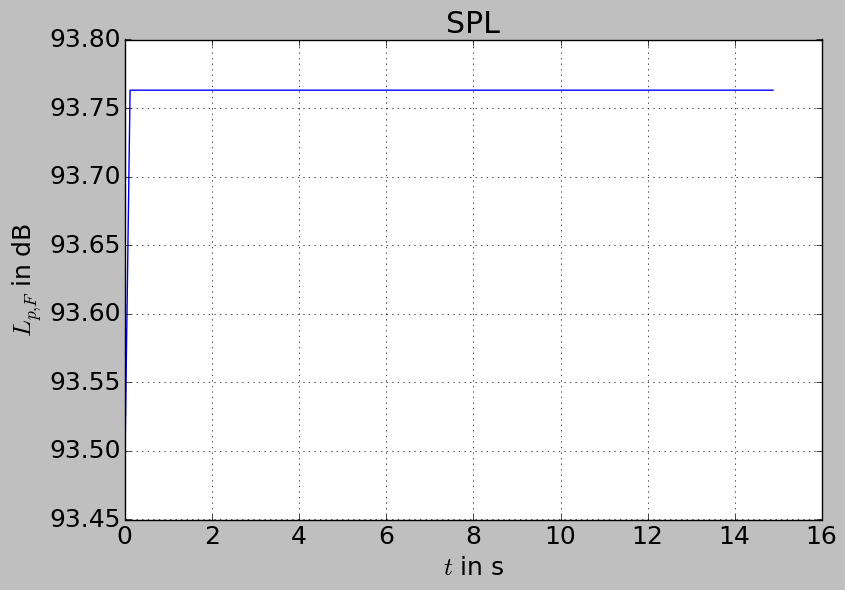

In [18]:
fig = signal.plot_levels()

### Atmospheric turbulence

In [19]:
model.settings['turbulence']['include'] = True
model.settings['turbulence']['amplitude'] = True
model.settings['turbulence']['phase'] = False
model.settings['turbulence']['saturation'] = False
model.settings['turbulence']['mean_mu_squared'] = 1.0e-8
model.settings['turbulence']['spatial_separation'] = True
model.settings['turbulence']['distance'] = None

signal = mono( rcv.auralise() )
model.settings['turbulence']['include'] = False

INFO:root:auralise: Auralising at receiver
INFO:root:auralise: Can auralise.
INFO:root:_auralise_source: Auralising source source
INFO:root:_auralise_subsource: Generating subsource emission signals.
INFO:root:_auralise_subsource: Determine mirrors.
INFO:root:_auralise_subsource: Not searching for mirror sources. Either reflections are disabled or there are no walls.
INFO:root:_apply_propagation_effects: Auralising mirror
INFO:root:_apply_propagation_effects: Applying turbulence.
INFO:root:apply_turbulence: Generating fluctuations for 7.943282347242818 Hz
INFO:root:apply_turbulence: Generating fluctuations for 15.848931924611138 Hz
INFO:root:apply_turbulence: Generating fluctuations for 31.6227766016838 Hz
INFO:root:apply_turbulence: Generating fluctuations for 63.09573444801933 Hz
INFO:root:apply_turbulence: Generating fluctuations for 125.89254117941672 Hz
INFO:root:apply_turbulence: Generating fluctuations for 251.188643150958 Hz
INFO:root:apply_turbulence: Generating fluctuations f

[ 141.42135659  141.42135659  141.42135659 ...,  141.42135659  141.42135659
  141.42135659]


In [20]:
Audio(data=signal, rate=fs)

/home/freddy/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


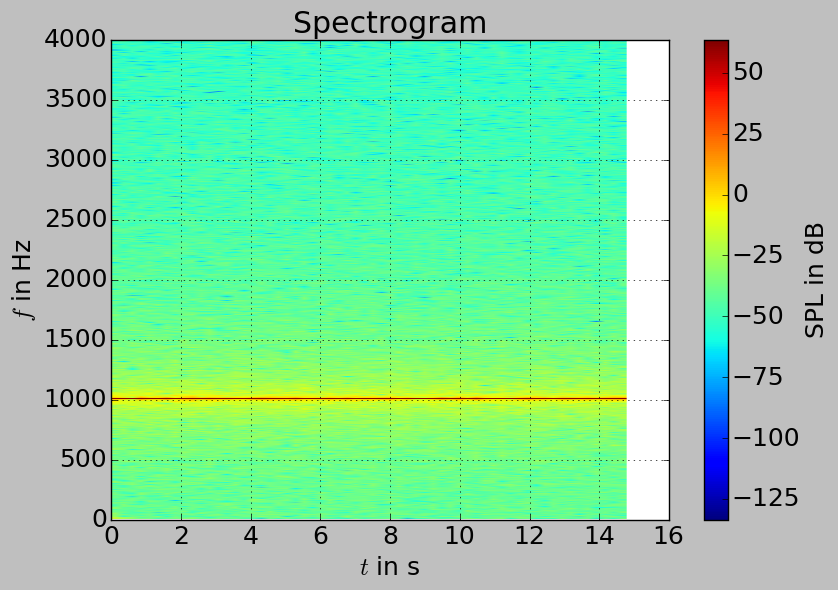

In [21]:
fig = signal.spectrogram(ylim=(0.0, 4000.0))

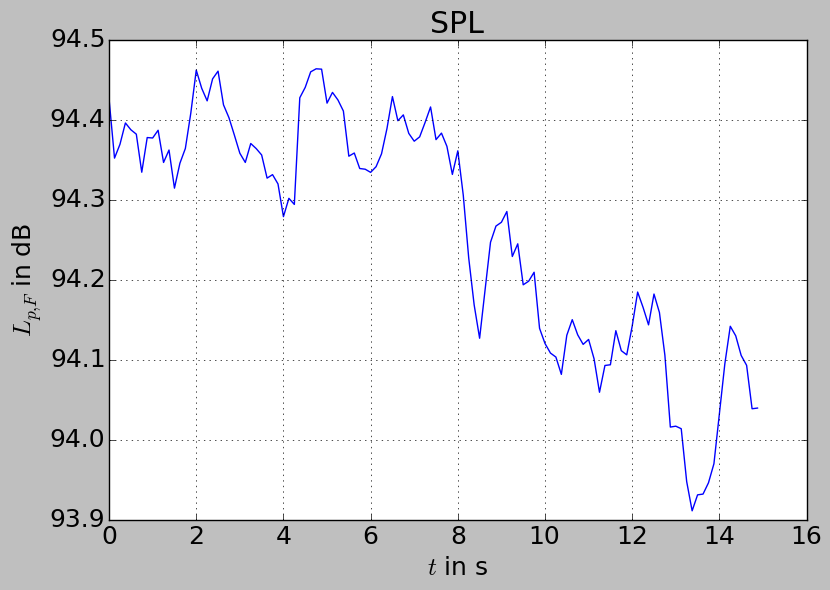

In [22]:
_ = signal.plot_levels()